In [83]:
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [84]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [85]:
enc = OrdinalEncoder()

# y*.shape = (num_sample, )
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1)).reshape(-1, )
y_test_enc = enc.transform(y_test.reshape(-1, 1)).reshape(-1, )
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1)).reshape(-1, )
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025,)


In [86]:
# 不需要指定num_class参数
model = XGBClassifier(
    booster='gbtree',
    n_jobs=-1,  # 对应nthread
    max_depth=6,
    min_child_weight=2,
    gamma=0,
    learning_rate=0.3,
    subsample=1,
    colsample_bytree=0.9,
    colsample_bylevel=0.9,
    reg_alpha=0,
    reg_lambda=0,
    objective='multi:softprob',
    verbosity=0,
    use_label_encoder=False)

In [87]:
model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_va, y_va_enc)],  # 对应evals
          sample_weight=1 / (y_train_enc + 1),  # 对应DMatrix(weight)
          verbose=50,  # 对应evals
          eval_metric='mlogloss',  # 对应eval_metric+feval
          early_stopping_rounds=100,
          )

[0]	validation_0-mlogloss:1.44828	validation_1-mlogloss:1.50895
[50]	validation_0-mlogloss:0.10451	validation_1-mlogloss:0.45883
[99]	validation_0-mlogloss:0.05345	validation_1-mlogloss:0.47786


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [88]:
# 预测结果(num_sample, )
model.predict(X_test)

array([4, 1, 1, 5, 4, 1, 1, 1, 0, 4, 0, 4, 5, 1, 1, 0, 1, 5, 1, 4, 0, 5,
       2, 0, 2, 1, 1, 0, 2, 3, 1, 5, 0, 4, 1, 1, 1, 2, 1, 5, 1, 1, 4, 1,
       1, 0, 4, 4, 0, 1, 1, 4, 1, 1, 0, 4, 2, 1, 2, 4, 1, 4, 2, 1, 0, 1,
       2, 4, 2, 3, 1, 1, 1, 0, 1, 3, 1, 2, 1, 2, 5, 4, 0, 6, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 2, 4, 4, 4, 3, 0, 1, 4, 1, 4, 4, 3, 2, 1, 2, 1, 1,
       1, 0, 2, 4, 4, 4, 2, 0, 1, 5, 4, 2, 5, 6, 4, 1, 1, 1, 6, 1, 1, 4,
       4, 4, 0, 4, 0, 0, 4, 0, 5, 5, 4, 0, 4, 4, 1, 1, 0, 1, 4, 1, 1, 5,
       0, 4, 5, 4, 4, 4, 0, 1, 0, 4, 1, 0, 1, 6, 1, 5, 0, 4, 1, 4, 4, 1,
       1, 4, 2, 2, 4, 1, 1, 4, 1, 4, 4, 1, 3, 2, 1, 1, 5, 1, 1, 4, 0, 1,
       1, 1, 1, 5, 5, 5, 1, 2, 1, 1, 4, 1, 2, 0, 1, 5, 0, 0, 1, 1, 3, 1,
       1, 4, 2, 1, 6, 5, 4, 0, 4, 0, 0, 4, 0, 1, 6, 1, 4, 4, 0, 0, 0, 4,
       4, 1, 3, 1, 3, 4, 1, 3, 2, 1, 6, 0, 0, 4, 1, 2, 0, 4, 6, 6, 1, 1,
       4, 1, 4, 2, 4, 0, 0, 1, 4, 1, 1, 2, 5, 0, 5, 1, 0, 4, 1, 0, 4, 4,
       4, 5, 0, 4, 4, 2, 0, 5, 4, 1, 5, 4, 0, 4], d

In [89]:
# 预测结果的概率矩阵
model.predict_proba(X_test)

array([[7.47585669e-04, 1.03021748e-02, 2.12529791e-04, ...,
        9.88174438e-01, 3.02463508e-04, 1.34766073e-04],
       [1.08289674e-01, 8.89007330e-01, 2.95122445e-04, ...,
        1.17730803e-03, 2.17501773e-04, 5.71411336e-04],
       [4.57959145e-01, 5.39938748e-01, 3.72781942e-04, ...,
        7.91996601e-04, 2.51700665e-04, 3.78198398e-04],
       ...,
       [6.94824755e-03, 3.34599218e-03, 5.20958056e-05, ...,
        9.89198983e-01, 8.77555867e-05, 8.21718641e-05],
       [9.85829294e-01, 1.35110468e-02, 1.07953354e-04, ...,
        1.80885458e-04, 1.16473660e-04, 1.14017123e-04],
       [1.32981542e-04, 1.98450265e-03, 5.93578261e-05, ...,
        9.97707486e-01, 5.25853648e-05, 3.26692461e-05]], dtype=float32)

In [90]:
# 准确率
model.score(X_test, y_test_enc)

0.83

In [91]:
model.evals_result_  # 对应evals_result

{'validation_0': OrderedDict([('mlogloss',
               [1.448282,
                1.187496,
                0.981126,
                0.842758,
                0.735032,
                0.644891,
                0.581015,
                0.523824,
                0.480275,
                0.447891,
                0.416208,
                0.387547,
                0.367433,
                0.346348,
                0.327536,
                0.31548,
                0.303143,
                0.291982,
                0.27935,
                0.268166,
                0.25666,
                0.242338,
                0.230916,
                0.219301,
                0.212503,
                0.204721,
                0.196217,
                0.190536,
                0.184243,
                0.179969,
                0.174828,
                0.170498,
                0.16491,
                0.16096,
                0.154895,
                0.149717,
                0.146752,


In [92]:
# 特征相对重要性
model.feature_importances_

array([0.02189864, 0.0047972 , 0.00513972, 0.00701862, 0.0048764 ,
       0.0097039 , 0.00439288, 0.00601767, 0.00542995, 0.0068857 ,
       0.05577649, 0.        , 0.00868996, 0.07887104, 0.00440054,
       0.        , 0.        , 0.        , 0.00581573, 0.        ,
       0.        , 0.        , 0.        , 0.00509535, 0.        ,
       0.03051914, 0.01580629, 0.        , 0.        , 0.010122  ,
       0.4941239 , 0.06753607, 0.00491744, 0.00626428, 0.        ,
       0.00191525, 0.01223033, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00465898, 0.03875256, 0.        ,
       0.05067195, 0.00703916, 0.        , 0.        , 0.        ,
       0.        , 0.00125057, 0.01938231, 0.        ], dtype=float32)

In [93]:
# 保存训练好的模型
model.save_model("xgb1.model")

In [94]:
# 加载训练好的模型
bst = XGBClassifier()
bst.load_model('xgb1.model')
bst.score(X_test, y_test_enc)

0.83

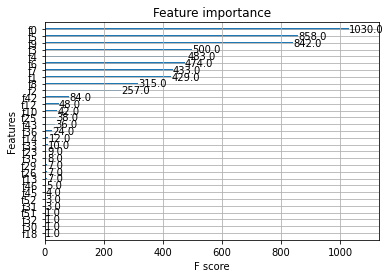

In [95]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 绘制特征的相对重要性
xgb.plot_importance(model)
plt.show()

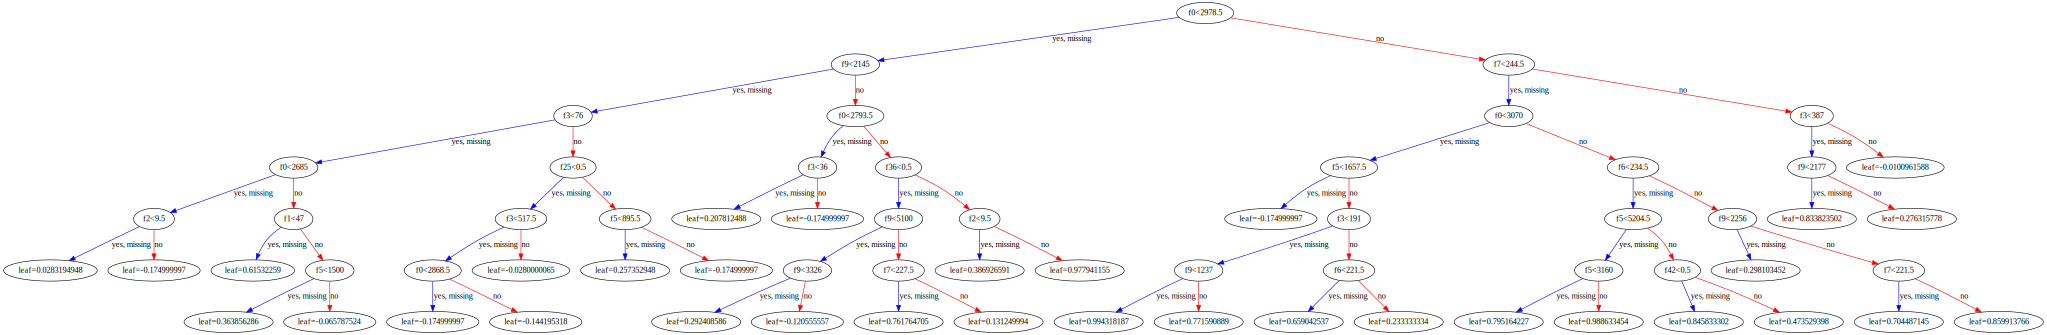

In [96]:
# 可视化lgb分割过程
xgb.to_graphviz(model)

In [97]:
df = model.get_booster().trees_to_dataframe()
df.head()

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,2978.5,0-1,0-2,0-1,291.028717,214.257156,NaN
1,0,1,0-1,f9,2145.0,0-3,0-4,0-3,26.460222,126.657150,NaN
2,0,2,0-2,f7,244.5,0-5,0-6,0-5,19.501343,87.600006,NaN
3,0,3,0-3,f3,76.0,0-7,0-8,0-7,6.295212,79.195923,NaN
4,0,4,0-4,f0,2793.5,0-9,0-10,0-9,19.201008,47.461227,NaN


In [98]:
# 决策路径
df[df['Tree'] == 0]

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,2978.5,0-1,0-2,0-1,291.028717,214.257156,NaN
1,0,1,0-1,f9,2145.0,0-3,0-4,0-3,26.460222,126.657150,NaN
2,0,2,0-2,f7,244.5,0-5,0-6,0-5,19.501343,87.600006,NaN
3,0,3,0-3,f3,76.0,0-7,0-8,0-7,6.295212,79.195923,NaN
4,0,4,0-4,f0,2793.5,0-9,0-10,0-9,19.201008,47.461227,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60,0,60,0-60,Leaf,NaN,NaN,NaN,NaN,0.988633,27.586008,NaN
61,0,61,0-61,Leaf,NaN,NaN,NaN,NaN,0.845833,7.346939,NaN
62,0,62,0-62,Leaf,NaN,NaN,NaN,NaN,0.473529,4.163266,NaN
63,0,63,0-63,Leaf,NaN,NaN,NaN,NaN,0.704487,2.046647,NaN
